<a href="https://colab.research.google.com/github/np03cs4a240319-eng/Concept-and-Technology-of-AI-Final-Assessment/blob/main/2510271_DivyaniKhatri_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset (PANDAS ONLY)
df = pd.read_csv("/content/hour.csv")
print(df.columns)
print(df.dtypes)


# Preview dataset
df.head()


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
# Structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [31]:
# Summary statistics
df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [32]:
# Missing values & duplicates
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate Rows: 0


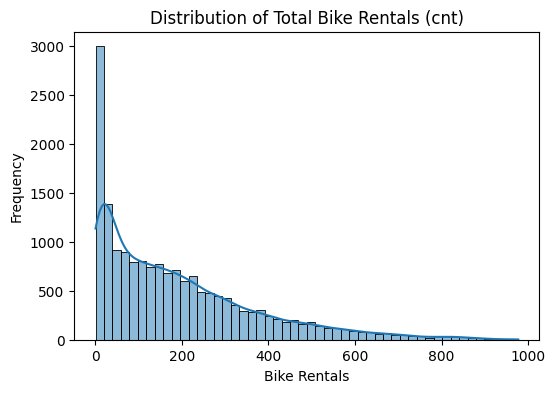

In [33]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.histplot(df['cnt'], bins=50, kde=True)
plt.title("Distribution of Total Bike Rentals (cnt)")
plt.xlabel("Bike Rentals")
plt.ylabel("Frequency")
plt.show()


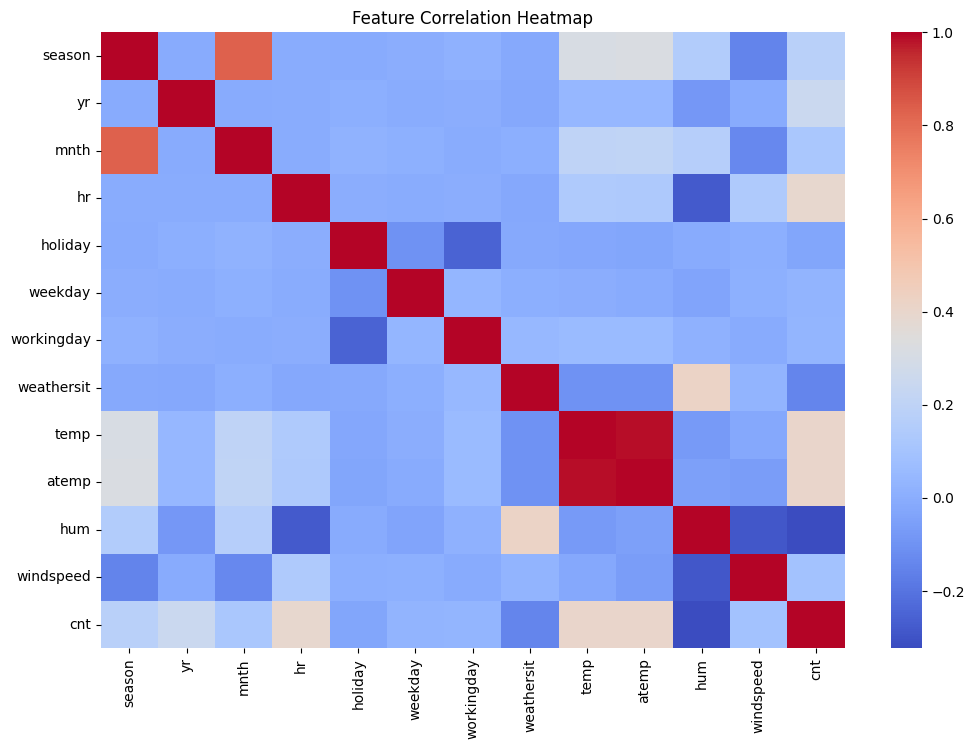

In [34]:
# Drop unnecessary and leakage columns
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


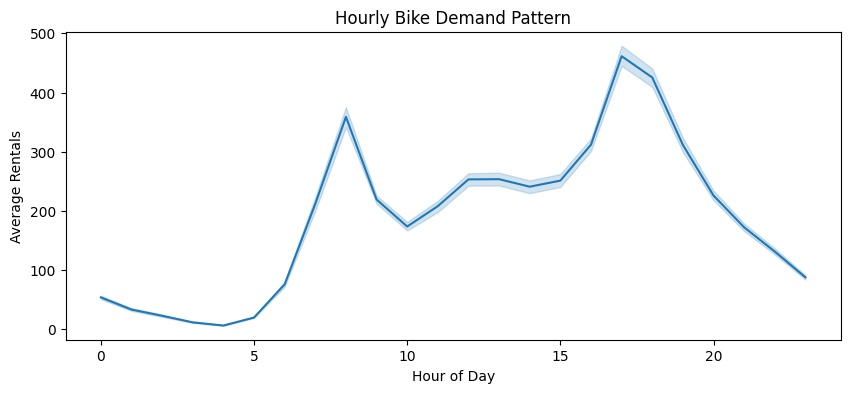

In [35]:
# Hour vs bike demand
plt.figure(figsize=(10,4))
sns.lineplot(x='hr', y='cnt', data=df)
plt.title("Hourly Bike Demand Pattern")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.show()


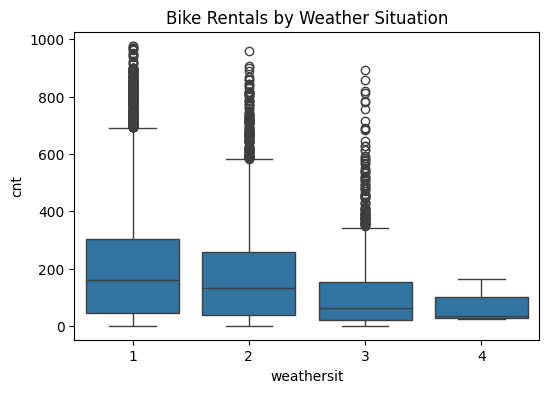

In [36]:
# Weather effect
plt.figure(figsize=(6,4))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title("Bike Rentals by Weather Situation")
plt.show()


/tmp/ipython-input-31618039.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_bin_mean = df.groupby('temp_bin')['cnt'].mean()


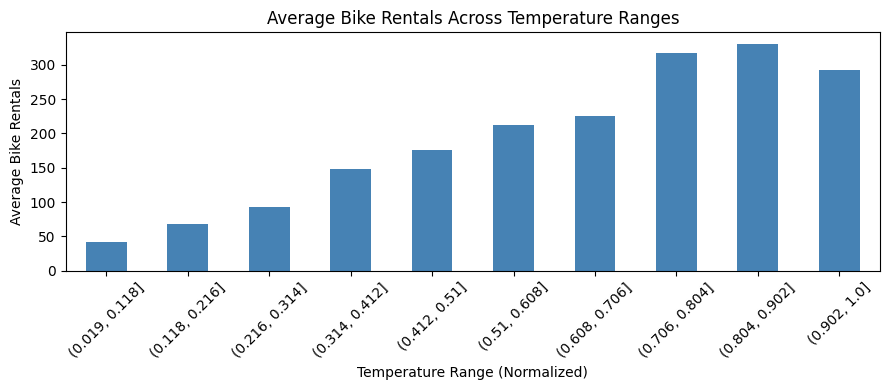

In [41]:
# Create temperature bins
df['temp_bin'] = pd.cut(df['temp'], bins=10)

# Compute mean rentals per temperature bin
temp_bin_mean = df.groupby('temp_bin')['cnt'].mean()

# Plot
plt.figure(figsize=(9,4))
temp_bin_mean.plot(kind='bar', color='steelblue')
plt.title("Average Bike Rentals Across Temperature Ranges")
plt.xlabel("Temperature Range (Normalized)")
plt.ylabel("Average Bike Rentals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate target from features
X = df.drop('cnt', axis=1)
y = df['cnt']

# Extract useful numeric info from 'dteday' if present
if 'dteday' in X.columns:
    X['dteday'] = pd.to_datetime(X['dteday'])
    X['year'] = X['dteday'].dt.year
    X['month'] = X['dteday'].dt.month
    X['day'] = X['dteday'].dt.day
    X['weekday'] = X['dteday'].dt.weekday
    X = X.drop('dteday', axis=1)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Preprocessing complete. Shapes:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)


Preprocessing complete. Shapes:
X_train_scaled: (13903, 23)
X_test_scaled: (3476, 23)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

mlp.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Train model
mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 56111.6289 - val_loss: 6957.5913
Epoch 2/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4907.5215 - val_loss: 1133.6089
Epoch 3/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 825.6797 - val_loss: 226.8105
Epoch 4/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 171.0694 - val_loss: 67.8391
Epoch 5/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 61.8564 - val_loss: 33.3074
Epoch 6/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 32.9797 - val_loss: 20.2096
Epoch 7/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.6421 - val_loss: 13.6051
Epoch 8/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4804 - val_loss: 9.5149
Epoch 9/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.2314 - val_loss: 7.2902
Epoch 10/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6442 - val_loss: 5.9504
Epoch 11/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4555 - val_loss: 4.9979
Epoch 12/30
348/348 ━━━━

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate
y_pred_mlp = mlp.predict(X_test_scaled).ravel()

mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mlp_r2 = r2_score(y_test, y_pred_mlp)

mlp_mae, mlp_rmse, mlp_r2


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(1.2644394636154175, np.float64(1.7946171382533371), 0.9998983144760132)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [54]:
#Copy your data
X_train_num = X_train.copy()
X_test_num = X_test.copy()

In [55]:

#Convert Interval columns to midpoints for Linear Regression
interval_cols = X_train_num.select_dtypes('interval').columns
for col in interval_cols:
    X_train_num[col] = X_train_num[col].apply(lambda x: x.mid)
    X_test_num[col] = X_test_num[col].apply(lambda x: x.mid)

In [56]:

#Convert any remaining non-numeric columns to dummies (one-hot encoding)
non_numeric_cols = X_train_num.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) > 0:
    X_train_num = pd.get_dummies(X_train_num, columns=non_numeric_cols, drop_first=True)
    X_test_num = pd.get_dummies(X_test_num, columns=non_numeric_cols, drop_first=True)
    # Align test set columns to training set
    X_test_num = X_test_num.reindex(columns=X_train_num.columns, fill_value=0)

In [57]:
#Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [58]:
#Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

In [59]:

#Train models
lr.fit(X_train_scaled, y_train)    # Linear Regression on scaled numeric data
rf.fit(X_train_num, y_train)       # Random Forest on numeric/dummy data

RandomForestRegressor(random_state=42)

In [60]:

#Predictions
lr_pred = lr.predict(X_test_scaled)
rf_pred = rf.predict(X_test_num)

In [61]:
# Evaluation function
def metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

lr_metrics = metrics(y_test, lr_pred)
rf_metrics = metrics(y_test, rf_pred)

lr_metrics, rf_metrics


({'MAE': 3.040615962567416e-13,
  'RMSE': np.float64(3.721574357664571e-13),
  'R2': 1.0},
 {'MAE': 0.9940017261219795,
  'RMSE': np.float64(2.828653899405812),
  'R2': 0.999747317892144})

In [95]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# ================== Load Data ==================
df = pd.read_csv('hour.csv')

# ================== X and y ==================
X = df.drop('cnt', axis=1)   # target is cnt
y = df['cnt']

# ================== Train Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================== Detect Column Types ==================
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# ================== Preprocessing ==================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# ================== Pipelines ==================
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# ================== Hyperparameters ==================
lr_params = {
    'model__fit_intercept': [True, False]
}

rf_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None]
}

# ================== GridSearch ==================
lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring='r2', n_jobs=-1)

# ================== Fit ==================
lr_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# ================== Results ==================
print("Best Linear Regression Params:", lr_grid.best_params_)
print("Best Random Forest Params:", rf_grid.best_params_)

lr_pred = lr_grid.predict(X_test)
rf_pred = rf_grid.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Random Forest R2:", r2_score(y_test, rf_pred))


Best Linear Regression Params: {'model__fit_intercept': True}
Best Random Forest Params: {'model__max_depth': 20, 'model__n_estimators': 200}
Linear Regression R2: 0.9999999999699145
Random Forest R2: 0.9997574128127177


In [98]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# 1. Drop non-numeric columns (like Date)
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

# 2. Feature selection
selector = SelectKBest(score_func=f_classif, k=8)
X_train_fs = selector.fit_transform(X_train_num, y_train)
X_test_fs = selector.transform(X_test_num)

# 3. Get selected feature names
selected_features = X_train_num.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

# 4. Scale AFTER feature selection
scaler = StandardScaler()
X_train_fs_scaled = scaler.fit_transform(X_train_fs)
X_test_fs_scaled = scaler.transform(X_test_fs)


Selected Features:
Index(['instant', 'yr', 'hr', 'temp', 'atemp', 'hum', 'casual', 'registered'], dtype='object')


In [103]:
# Remove pipeline prefix for Random Forest
rf_params = {
    k.replace("model__", ""): v
    for k, v in rf_grid.best_params_.items()
}

best_rf = RandomForestRegressor(
    **rf_params,
    random_state=42
)

best_rf.fit(X_train[selected_features], y_train)
rf_final_pred = best_rf.predict(X_test[selected_features])


In [104]:
lr_params = {
    k.replace("model__", ""): v
    for k, v in lr_grid.best_params_.items()
}

best_lr = LinearRegression(**lr_params)
best_lr.fit(X_train_fs, y_train)
lr_final_pred = best_lr.predict(X_test_fs)


In [105]:
rf_params = {
    k.replace("model__", ""): v
    for k, v in rf_grid.best_params_.items()
}

best_rf = RandomForestRegressor(
    **rf_params,
    random_state=42
)

best_rf.fit(X_train[selected_features], y_train)
rf_final_pred = best_rf.predict(X_test[selected_features])


In [106]:
final_results = pd.DataFrame({
    "Model": ["MLP Neural Network", "Linear Regression", "Random Forest"],
    "MAE": [
        mlp_mae,
        mean_absolute_error(y_test, lr_final_pred),
        mean_absolute_error(y_test, rf_final_pred)
    ],
    "RMSE": [
        mlp_rmse,
        np.sqrt(mean_squared_error(y_test, lr_final_pred)),
        np.sqrt(mean_squared_error(y_test, rf_final_pred))
    ],
    "R2": [
        mlp_r2,
        r2_score(y_test, lr_final_pred),
        r2_score(y_test, rf_final_pred)
    ]
})

final_results


,Model,MAE,RMSE,R2
0,MLP Neural Network,1.264439e+00,1.794617e+00,0.999898
1,Linear Regression,2.475787e-11,2.865296e-11,1.000000
2,Random Forest,8.780375e-01,2.628604e+00,0.999782
